In [1]:
import pandas as pd

# Load the Titanic datasets
train_data_path = "D:\Excelr\Data Science\Data Science Assignment\Logistic Regression\Logistic Regression\Titanic_train.csv"
test_data_path = "D:\Excelr\Data Science\Data Science Assignment\Logistic Regression\Logistic Regression\Titanic_test.csv"
# Load the data
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
# Display the first few rows
train_df_info = train_df.info()
train_df_head = train_df.head()
# Generate summary statistics for numerical features
train_df_describe = train_df.describe()

train_df_info, train_df_head, train_df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

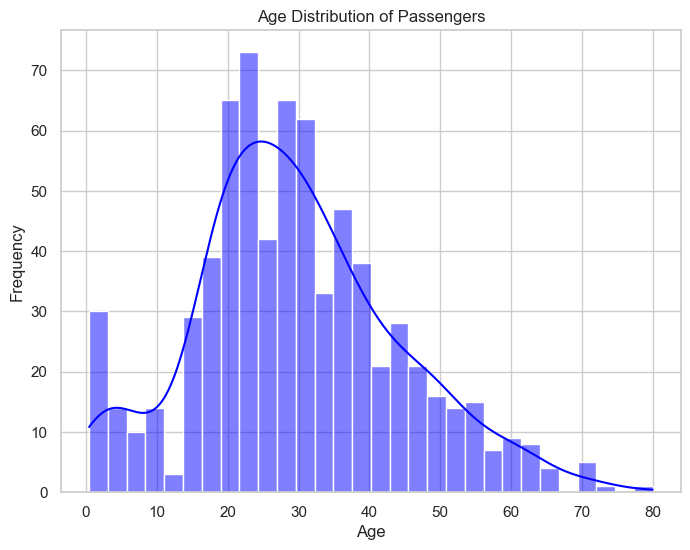

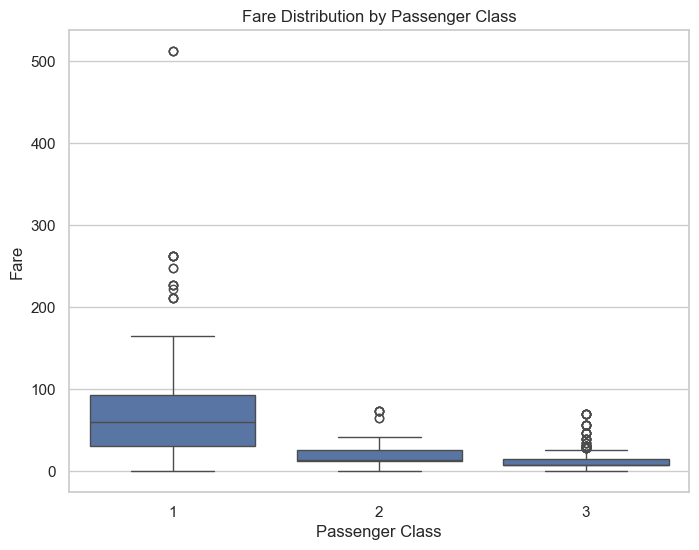

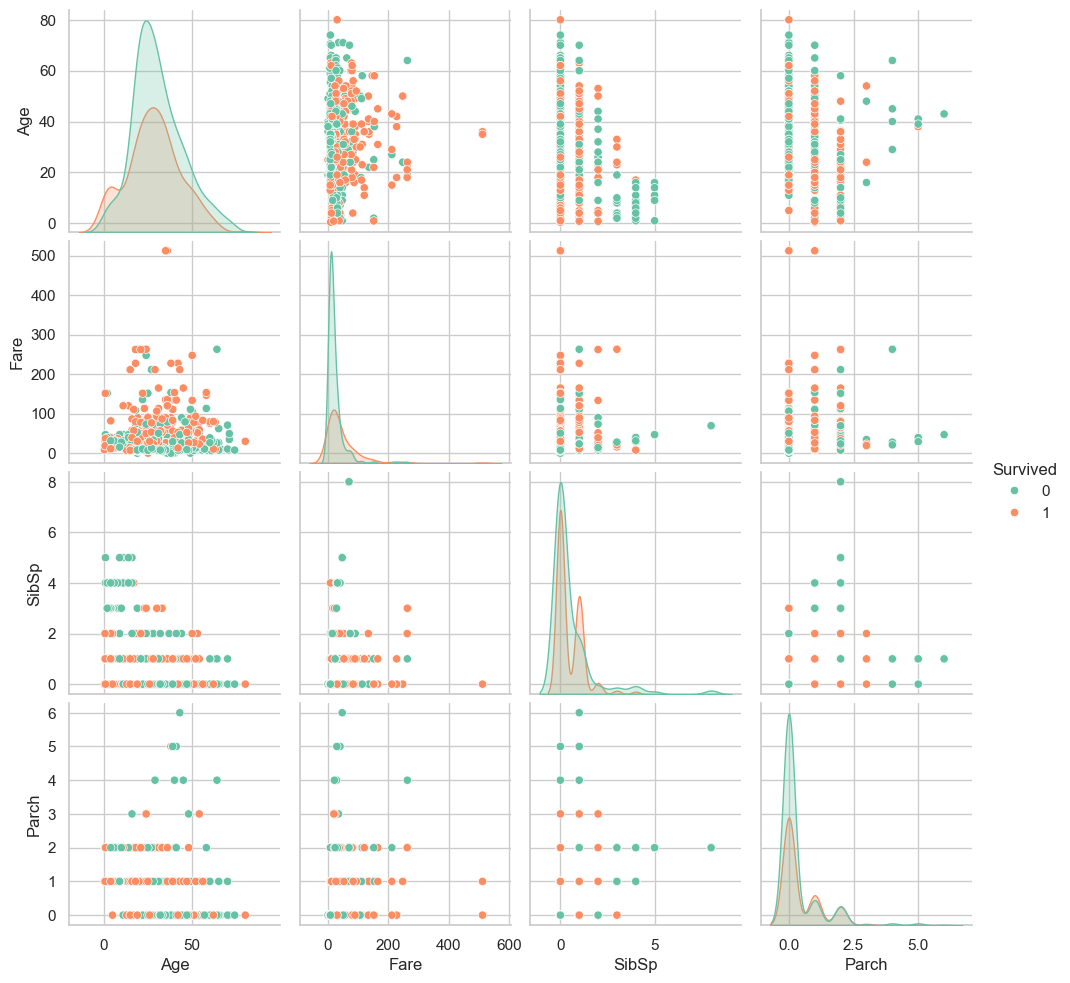

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")
# 1. Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of Fare by Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# 3. Pair plot to visualize relationships between numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.pairplot(train_df[numerical_features], hue='Survived', diag_kind='kde', palette="Set2")
plt.show()

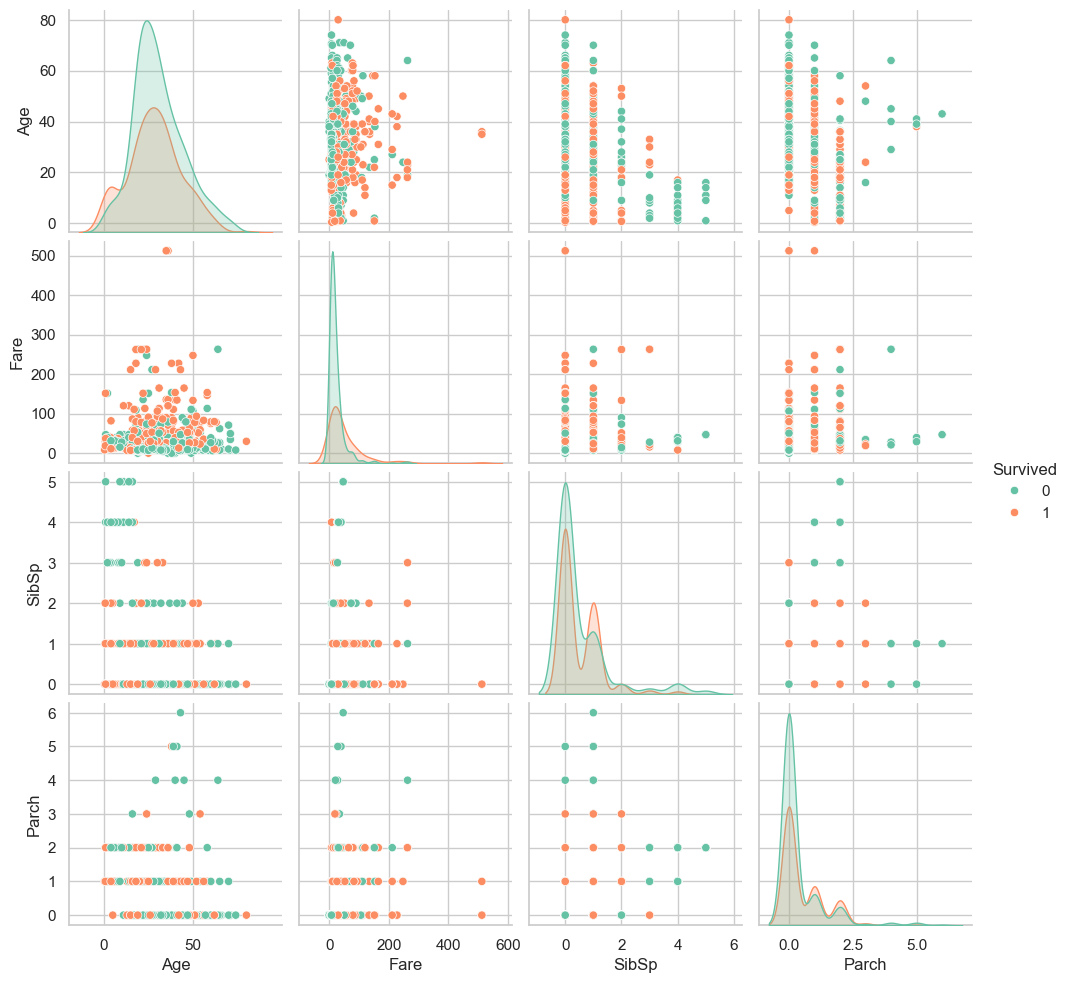

In [3]:
# Handle missing values by removing rows with NaNs
clean_train_df = train_df[numerical_features].dropna()

# the pair plot with the cleaned data
sns.pairplot(clean_train_df, hue='Survived', diag_kind='kde', palette="Set2")
plt.show()

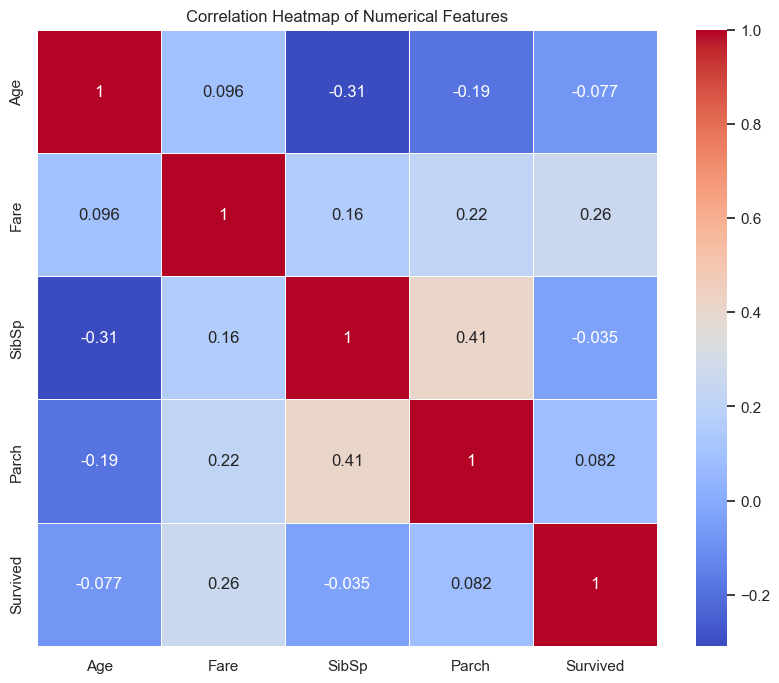

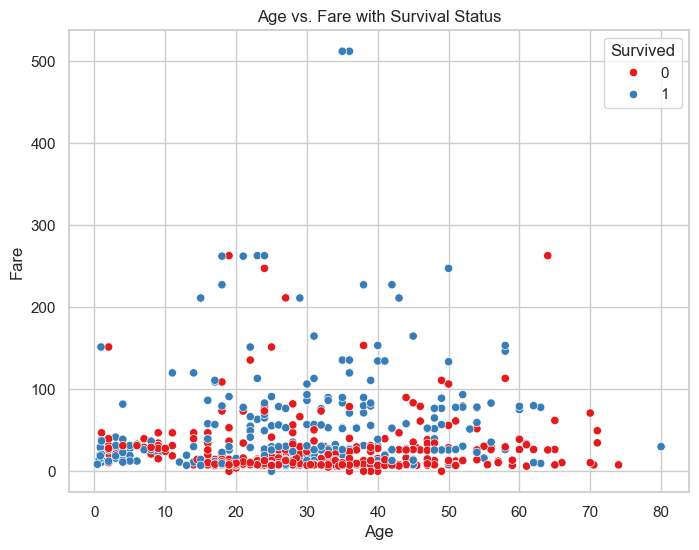

In [4]:
# Generate a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Scatter plot of Age vs. Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette="Set1")
plt.title('Age vs. Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [5]:
# 1. Handle missing values
# Impute missing 'Age' with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop the 'Cabin' column due to too many missing values
train_df.drop('Cabin', axis=1, inplace=True)

# Impute missing 'Embarked' values with the most frequent value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# 2. Encode categorical variables
# Encode 'Sex' as 0 for male and 1 for female
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Check the processed data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Separate features (X) and target (y)
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])  # Exclude irrelevant columns
y = train_df['Survived']

# 2. Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# 4. Train the model using the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = log_reg_model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)

accuracy

import pickle

# Save the trained model
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(log_reg_model, f)

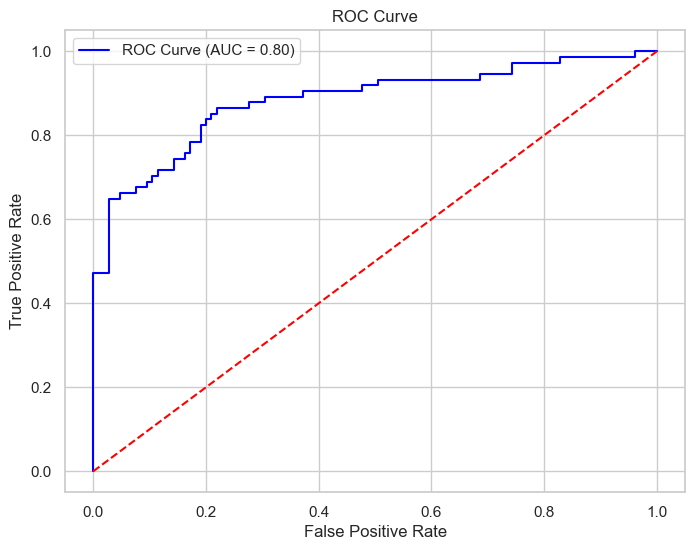

(0.7857142857142857,
 0.7432432432432432,
 0.7638888888888888,
 0.8001930501930502)

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate precision, recall, F1-score, and ROC-AUC score
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_val, log_reg_model.predict_proba(X_val)[:, 1])

# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# the computed metrics
precision, recall, f1, roc_auc

In [8]:
# Extract the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_model.coef_[0]
})

# Sort by the absolute value of the coefficients to see the most impactful features
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients_sorted

,Feature,Coefficient
1,Sex,2.591383
5,Fare,0.002579
2,Age,-0.030574
4,Parch,-0.108161
6,Embarked_Q,-0.112324
3,SibSp,-0.295223
7,Embarked_S,-0.400069
0,Pclass,-0.938010


In [9]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

# saved the model as 'titanic_model.pkl'
with open('titanic_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Titanic Survival Prediction App")

# Collecting user input for the features
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3], index=0)
sex = st.selectbox("Sex", ["Male", "Female"], index=0)
age = st.slider("Age", 0, 100, 29)
sibsp = st.slider("Number of Siblings/Spouses Aboard (SibSp)", 0, 8, 0)
parch = st.slider("Number of Parents/Children Aboard (Parch)", 0, 6, 0)
fare = st.slider("Fare Paid", 0.0, 512.0, 32.0)
embarked = st.selectbox("Port of Embarkation", ["Cherbourg", "Queenstown", "Southampton"], index=2)

# Convert the user input to a DataFrame
user_input = pd.DataFrame({'Pclass': [pclass],'Sex': [1 if sex == "Female" else 0],'Age': [age],'SibSp': [sibsp],'Parch': [parch],'Fare': [fare],
                           'Embarked_Q': [1 if embarked == "Queenstown" else 0],'Embarked_S': [1 if embarked == "Southampton" else 0]})

# Make the prediction using the model
prediction = model.predict(user_input)
prediction_proba = model.predict_proba(user_input)

# Display the prediction
if prediction[0] == 1:
    st.success(f"The passenger is likely to survive with a probability of {prediction_proba[0][1]:.2f}")
else:
    st.error(f"The passenger is unlikely to survive with a probability of {prediction_proba[0][0]:.2f}")

2024-09-24 12:27:30.047 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:27:30.996 
  command:

    streamlit run C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-24 12:27:30.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:27:30.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:27:30.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:27:31.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:27:31.004 Session state does not function when running a script without `streamlit run`
2024-09-24 12:27:31.005 Thread 'MainThread': missing